#DA R4 : Twitter Data Analysis

---

Use Twitter data for sentiment analysis. The dataset is 3MB in size and has 31,962 tweets. Identify the tweets which are hate tweets and which are not.

##Programmer's Perspective


Let S be the system set:

>S = {s; e;X; Y; Fme;DD;NDD; Fc; Sc}
*   where Dataset is loaded into the dataframe

---

s=start state 

e=end state
*   predicted state of tweets (0 - Not a Hate Tweet, 1 - Hate Tweet)

X=set of inputs
X = {X1}
*   where X1 =  Twitter Dataset (31962 records, 2 columns)

Y=set of outputs
  Y = {Y1, Y2, Y3}
*   Y1 = Predicted Values
*   Y2 = Confusion Matrix
*   Y3 = Accuracy Score

Fme is the set of main functions
*   Fe = {f0}
  1. f0 = Main Display Function
  
Ff is the set of friend functions
*   Ff = {f1,f2,f3,f4,f5} where
  1. f1 = function to download dataset using kaggle API
  2. f2 = function to load dataset into pandas dataframe
  3. f3 = function to clean tweets
  4. f4 = function to split dataset into test and train data
  5. f5 = function to train the model
    
DD = Deterministic Data
*   Twitter Dataset

NDD = Non-deterministic data (Eg - Null Values in Dataset)
*   No null value detected

Fc = failure case
*   Low Value of Accuracy Score




##Dataset Description

We have been provided with 31962 tweets and our aim is to predict whether the tweet is a hate tweet or not.

The dataset has two features - tweet and label

In this problem tweet is our independant variable and label is the dependant variable.

##Flowchart

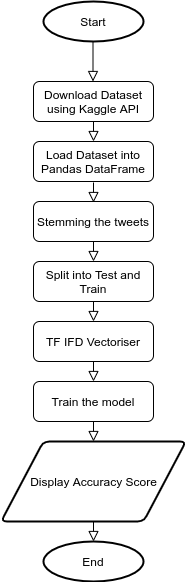

##Main Assignment

###Download dataset using Kaggle CLI

In [ ]:
#Installing Kaggle and Kaggle CLI Python Libraries
!pip install -q kaggle
!pip install -q kaggle-cli

#Use Apoorv's Kaggle Account's API token to download Kaggle Dataset to Colab
#We store this API token in "kaggle.json"
f = open("kaggle.json","w+")
f.write('{"username":"apoorvdixit99","key":"07ea0b3ad4b87e5e87c0f1dcd3f10e86"}')
f.close()

#IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle
#The -p will create the directory (along with the directories that lead to the directory you want to create)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Warning: Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
#Chmod 600 (chmod a+rwx,u-x,g-rwx,o-rwx) sets permissions so that,
#(U)ser / owner can read, can write and can't execute.
#(G)roup can't read, can't write and can't execute.
#(O)thers can't read, can't write and can't execute.
!chmod 600 ~/.kaggle/kaggle.json

#Download the dataset
!kaggle datasets download -d dv1453/twitter-sentiment-analysis-analytics-vidya

#Unzip the dataset
!unzip \twitter-sentiment-analysis-analytics-vidya.zip

#Remove Unnecessary Files
!rm -rf kaggle.json
!rm -r sample_data
!rm -r twitter-sentiment-analysis-analytics-vidya.zip

     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 5.3MB 12.3MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 112kB 51.6MB/s 
     |████████████████████████████████| 133kB 47.6MB/s 
  0% 0.00/1.93M [00:00<?, ?B/s]
100% 1.93M/1.93M [00:00<00:00, 108MB/s]
Archive:  twitter-sentiment-analysis-analytics-vidya.zip
  inflating: sample_submission_gfvA5FD.csv  
  inflating: test_tweets_anuFYb8.csv  
  inflating: train_E6oV3lV.csv       


###Loading the dataset into Pandas Dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_E6oV3lV.csv')
df.drop(columns=['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [ ]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


###Stemming the tweets

In [ ]:
import nltk
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()

def clean_sentences(text):

    text = text.lower() #convert to lower case
    
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text) #remove special characters
    text = " ".join(text.split())
    
    text = " ".join(stemmer.stem(word) for word in text.split()) #Stem each word in tweet
    
    return text

x = df['tweet']
y = df['label']

x = x.map(lambda a: clean_sentences(a))

###Test-Train Split with stratify

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

####Distribution in Original Dataframe

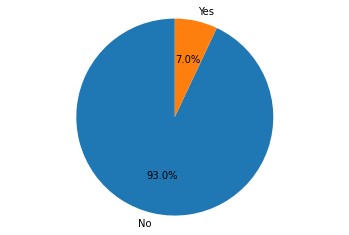

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No', 'Yes']
sizes = df.label.value_counts().tolist()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

####Distribution in Test and Train without stratify

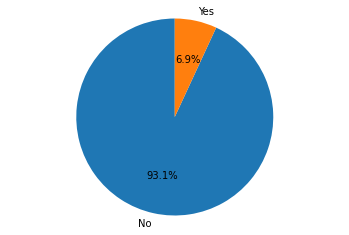

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No', 'Yes']
sizes = y_train.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

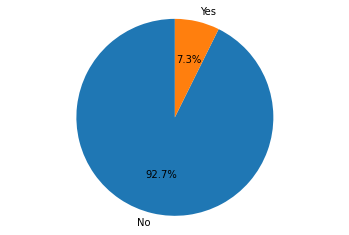

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No', 'Yes']
sizes = y_test.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

####Distribution in Test and Train with Stratify

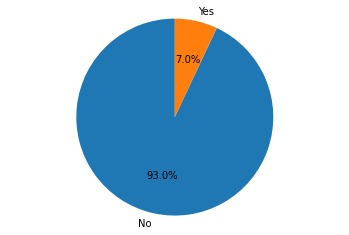

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No', 'Yes']
sizes = y_train.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

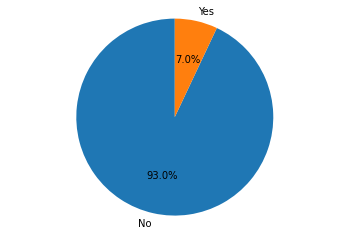

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['No', 'Yes']
sizes = y_test.value_counts().tolist()
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### TF IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english') #Stop Words = {this, is, the, a, an ...}
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [ ]:
x_train

<23971x29770 sparse matrix of type '<class 'numpy.float64'>'
	with 181610 stored elements in Compressed Sparse Row format>

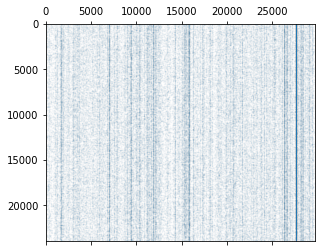

In [ ]:
import matplotlib.pylab as plt
import scipy.sparse as sparse
plt.spy(x_train,markersize=0.01)

###Training the model

In [ ]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
print("Confusion Matrix : \n",confusion_matrix(y_test,model.predict(x_test)),"\n")
print("Accuracy Score : ",accuracy_score(y_test,model.predict(x_test)))
print("Recall Score : ",precision_score(y_test,model.predict(x_test)))
print("Precision Score : ",recall_score(y_test,model.predict(x_test)))
print("F1 Score : ",f1_score(y_test,model.predict(x_test)))

Confusion Matrix : 
 [[7383   47]
 [ 241  320]] 

Accuracy Score :  0.9639594543861845
Recall Score :  0.8719346049046321
Precision Score :  0.5704099821746881
F1 Score :  0.6896551724137931


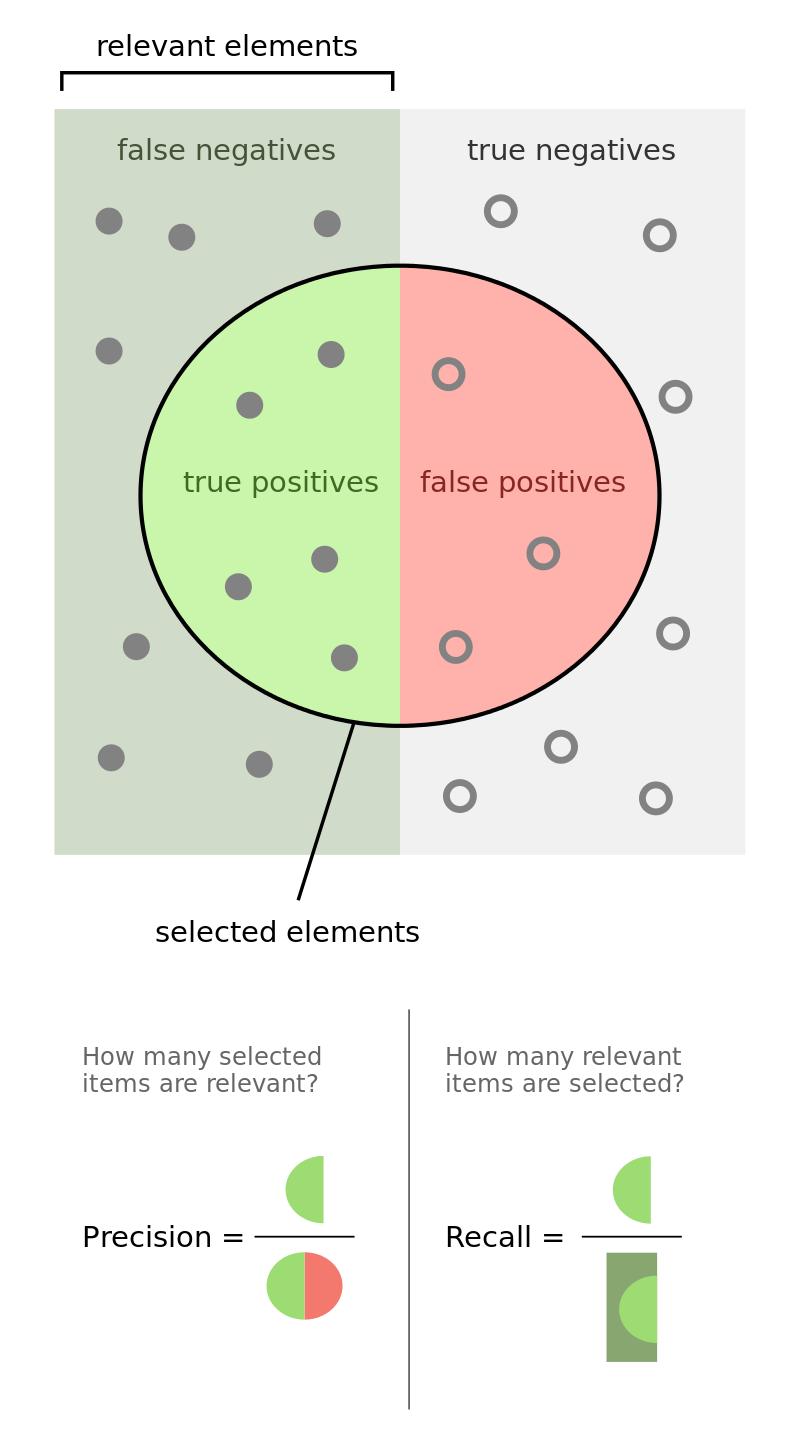

##Modification

###Original

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

df = pd.read_csv('train_E6oV3lV.csv')
df.drop(columns=['id'], axis=1, inplace=True)

stemmer = PorterStemmer()

def clean_sentences(text):
    text = text.lower() #convert to lower case
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text) #remove special characters
    text = " ".join(text.split())
    text = " ".join(stemmer.stem(word) for word in text.split()) #Stem each word in tweet
    return text

x = df['tweet']
y = df['label']

x = x.map(lambda a: clean_sentences(a))

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

vectorizer = TfidfVectorizer(stop_words='english') #Stop Words = {this, is, the, a, an ...}
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model = LinearSVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Recall Score : ",precision_score(y_test,y_pred))
print("Precision Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Confusion Matrix : 
 [[7374   56]
 [ 200  361]] 

Accuracy Score :  0.9679639594543862
Recall Score :  0.8657074340527577
Precision Score :  0.64349376114082
F1 Score :  0.738241308793456


###Train Size = 1%

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

df = pd.read_csv('train_E6oV3lV.csv')
df.drop(columns=['id'], axis=1, inplace=True)

stemmer = PorterStemmer()

def clean_sentences(text):
    text = text.lower() #convert to lower case
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text) #remove special characters
    text = " ".join(text.split())
    text = " ".join(stemmer.stem(word) for word in text.split()) #Stem each word in tweet
    return text

x = df['tweet']
y = df['label']

x = x.map(lambda a: clean_sentences(a))

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y, train_size=0.01)

vectorizer = TfidfVectorizer(stop_words='english') #Stop Words = {this, is, the, a, an ...}
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model = LinearSVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Recall Score : ",precision_score(y_test,y_pred))
print("Precision Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Confusion Matrix : 
 [[29387    36]
 [ 2091   129]] 

Accuracy Score :  0.9327813418449578
Recall Score :  0.7818181818181819
Precision Score :  0.05810810810810811
F1 Score :  0.10817610062893084


###Equal number of positive and negative tweets (2000 each)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
import re

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

df = pd.read_csv('train_E6oV3lV.csv')
df.drop(columns=['id'], axis=1, inplace=True)

df_neg = df[df['label']==1]
df_neg = shuffle(df_neg)
df_neg = df_neg[0:2000]

df_pos = df[df['label']==0]
df_pos = shuffle(df_pos)
df_pos = df_pos[0:2000]

df = [df_pos, df_neg]
df = pd.concat(df)

stemmer = PorterStemmer()

def clean_sentences(text):
    text = text.lower() #convert to lower case
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text) #remove special characters
    text = " ".join(text.split())
    text = " ".join(stemmer.stem(word) for word in text.split()) #Stem each word in tweet
    return text

x = df['tweet']
y = df['label']

x = x.map(lambda a: clean_sentences(a))

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

vectorizer = TfidfVectorizer(stop_words='english') #Stop Words = {this, is, the, a, an ...}
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model = LinearSVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("Recall Score : ",precision_score(y_test,y_pred))
print("Precision Score : ",recall_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred))

Confusion Matrix : 
 [[426  74]
 [ 71 429]] 

Accuracy Score :  0.855
Recall Score :  0.852882703777336
Precision Score :  0.858
F1 Score :  0.8554336989032901


###Twitter Sentiment Analysis using LSTM Sequence Model

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli
f = open("kaggle.json","w+")
f.write('{"username":"apoorvdixit99","key":"07ea0b3ad4b87e5e87c0f1dcd3f10e86"}')
f.close()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d dv1453/twitter-sentiment-analysis-analytics-vidya
!unzip \twitter-sentiment-analysis-analytics-vidya.zip
!rm -rf kaggle.json
!rm -r sample_data
!rm -r twitter-sentiment-analysis-analytics-vidya.zip

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 5.3MB 11.8MB/s 
     |████████████████████████████████| 112kB 62.3MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 133kB 62.9MB/s 
  0% 0.00/1.93M [00:00<?, ?B/s]
100% 1.93M/1.93M [00:00<00:00, 60.6MB/s]
Archive:  twitter-sentiment-analysis-analytics-vidya.zip
  inflating: sample_submission_gfvA5FD.csv  
  inflating: test_tweets_anuFYb8.csv  
  inflating: train_E6oV3lV.csv       


In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

In [ ]:
df = pd.read_csv('train_E6oV3lV.csv')
df.drop(columns=['id'], axis=1, inplace=True)

df['tweet'] = df['tweet'].apply(lambda x: x.lower())
df['tweet'] = df['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print("Number of Normal Tweets : ",df[ df['label'] == 0]['label'].count())
print("Number of Hate Tweets : ",df[ df['label'] == 1]['label'].count())
    
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['tweet'].values)
X = tokenizer.texts_to_sequences(df['tweet'].values)
X = pad_sequences(X)

Number of Normal Tweets :  29720
Number of Hate Tweets :  2242


In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 128)           256000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 32, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, stratify=Y)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(23971, 32) (23971, 2)
(7991, 32) (7991, 2)


In [ ]:
model.fit(X_train, Y_train, epochs = 1, verbose = 1)

750/750 [==============================] - 97s 130ms/step - loss: 0.1781 - accuracy: 0.9420


In [ ]:
Y_pred = model.predict(X_test)
Y_pred = Y_pred[:,1]
Y_pred = Y_pred*2
Y_pred = Y_pred.astype(int)


In [ ]:
Y_test=Y_test[:,1]
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred),"\n")
print("Accuracy Score : ",accuracy_score(Y_test,Y_pred))
print("Recall Score : ",precision_score(Y_test,Y_pred))
print("Precision Score : ",recall_score(Y_test,Y_pred))
print("F1 Score : ",f1_score(Y_test,Y_pred))

Confusion Matrix : 
 [[7416   14]
 [ 400  161]] 

Accuracy Score :  0.9481917156801402
Recall Score :  0.92
Precision Score :  0.28698752228163993
F1 Score :  0.4375


###Dataset with Neutral Sentiment - Airport Reviews

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli
f = open("kaggle.json","w+")
f.write('{"username":"apoorvdixit99","key":"07ea0b3ad4b87e5e87c0f1dcd3f10e86"}')
f.close()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d crowdflower/twitter-airline-sentiment
!unzip /content/twitter-airline-sentiment.zip

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score, f1_score

df = pd.read_csv('Tweets.csv')
df=df[['text','airline_sentiment']]

x = df['text']
y = df['airline_sentiment']  

stemmer = PorterStemmer()

def clean_sentences(text):
    text = text.lower() #convert to lower case
    text = re.sub(r"[^a-z0-9^,!.\/']", " ", text) #remove special characters
    text = " ".join(text.split())
    text = " ".join(stemmer.stem(word) for word in text.split()) #Stem each word in tweet
    return text

x = x.map(lambda a: clean_sentences(a))

le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

vectorizer = TfidfVectorizer(stop_words='english') #Stop Words = {this, is, the, a, an ...}
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

model = LinearSVC()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score : ",accuracy_score(y_test,y_pred))
print("F1 Score : ",f1_score(y_test,y_pred,average='weighted'))


     |████████████████████████████████| 81kB 3.3MB/s 
     |████████████████████████████████| 5.3MB 8.8MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 112kB 57.9MB/s 
     |████████████████████████████████| 133kB 57.2MB/s 
  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 76.7MB/s]
Archive:  /content/twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         
Confusion Matrix : 
 [[2078  152   64]
 [ 282  415   78]
 [ 109   75  407]] 

Accuracy Score :  0.7923497267759563
F1 Score :  0.7862289093960948


###Hindi Movie Reviews Dataset - Positive Negative and Neutral

In [ ]:
!pip install -q kaggle
!pip install -q kaggle-cli
f = open("kaggle.json","w+")
f.write('{"username":"apoorvdixit99","key":"07ea0b3ad4b87e5e87c0f1dcd3f10e86"}')
f.close()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d disisbig/hindi-movie-reviews-dataset
!unzip hindi-movie-reviews-dataset.zip

!pip install stanza
import stanza
stanza.download('hi')
hi_stanza = stanza.Pipeline('hi', processors='tokenize,lemma', verbose=True, use_gpu=True)

import pandas as pd
df = pd.read_csv('train.csv')
df2 = pd.read_csv('valid.csv')
X_train = df['text']
Y_train = df['experience']
X_test = df2['text']
Y_test = df2['experience']

In [ ]:
import re

def clean_review(hindi_text):
  
  hindi_text = re.sub('[-।,:?;!\(\)]','',hindi_text)
  hindi_text = " ".join(hindi_text.split())

  hi_doc = hi_stanza(hindi_text)

  text_lemma = []
  for sentence in hi_doc.sentences:
      for word in sentence.words:
          text_lemma.append(word.lemma)
  text_lemma = " ".join(word for word in text_lemma)
  return text_lemma

X_train_cleaned = X_train.map(lambda x: clean_review(x))
X_test_cleaned = X_test.map(lambda x: clean_review(x))

In [ ]:
X_train_cleaned.to_csv('X_train_cleaned.csv', index=False)
X_test_cleaned.to_csv('X_test_cleaned.csv', index=False)

In [ ]:
%%capture
!pip install cltk
from cltk.stop.classical_hindi.stops import STOPS_LIST as stop_words_hindi
stop_words_hindi

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words=stop_words_hindi) #Stop Words = {this, is, the, a, an ...}
X_train_Vectorized = vectorizer.fit_transform(X_train_cleaned)
X_test_Vectorized = vectorizer.transform(X_test_cleaned)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

model = LinearSVC()
model.fit(X_train_Vectorized,Y_train)

Y_pred = model.predict(X_test_Vectorized)
print("Confusion Matrix : \n",confusion_matrix(Y_test,Y_pred),"\n")
print("Accuracy Score : ",accuracy_score(Y_test,Y_pred))
print("F1 Score : ",f1_score(Y_test,Y_pred,average='weighted'))

Confusion Matrix : 
 [[27 14 12]
 [20 27 18]
 [13 12 37]] 

Accuracy Score :  0.5055555555555555
F1 Score :  0.5035504878502846
